In [1]:
import const
%matplotlib inline
from jupyterthemes import jtplot
jtplot.style()
import matplotlib.pyplot as plt
%matplotlib inline

'''set matplotlib rcparams to match jupyter theme'''
#from jupyterthemes import jtplot
#jtplot.style()

#import matplotlib as mpl
#mpl.rcParams['figure.figsize'] = (6, 4)

'set matplotlib rcparams to match jupyter theme'

                                   uranus                model                ratio
                mass            14.525969            14.525969             1.000000
              radius           2.5362e+09          2.49668e+09             1.015831
               gsurf           900.760174           929.505337             0.969075



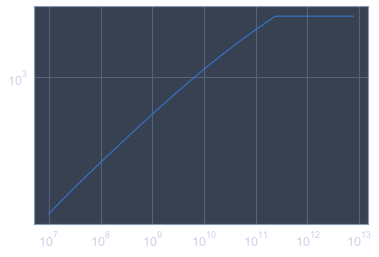

In [2]:
'''rough static model for present-day uranus'''

import ongp; reload(ongp) # reload to catch any changes to the module

mu = const.uranus_mass / const.mearth
ru = const.uranus_rvol
gu = (const.cgrav * const.uranus_mass / const.uranus_rvol ** 2)

f = ongp.evol(z_eos_option='reos water', atm_option='f11_tables u')
f.static(mtot='u', mcore=13., zenv=0.1, t10=150.)

'''the large `core' mass means H/He envelope extends only to relatively low pressures
(e.g., p ~ 0.1 Mbar) which seems necessary to avoid going off the scvh tables
by being to cold at P > 11.4 Mbar. this issue usually manifests as nans in grada.'''


print '%20s %20s %20s %20s' % ('', 'uranus', 'model', 'ratio')
print '%20s %20f %20f %20f' % ('mass', mu, f.mtot / const.mearth, mu / f.mtot * const.mearth)
print '%20s %20g %20g %20f' % ('radius', ru, f.rtot, ru / f.rtot)
print '%20s %20f %20f %20f' % ('gsurf', gu, f.surface_g, gu / f.surface_g)
print 

plt.loglog(f.p, f.t)


512 2502793704.32 0.986828209258
1024 2496675746.87 0.984415955709
2048 2493805855.02 0.983284384126
4096 2492420716.54 0.982738236945
8192 2491741070.87 0.982470258999
16384 2491419815.31 0.982343590926


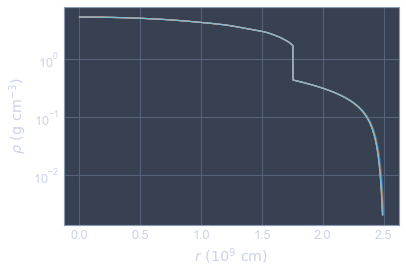

In [3]:
'''a quick spatial resolution test for the static uranus'''
import ongp
reload(ongp)
for nz in (512, 1024, 2048, 4096, 8192, 16384):
    u = ongp.evol(nz=nz, z_eos_option='reos water', atm_option='f11_tables u')
    u.static(mtot='u', mcore=13., zenv=0.1, t10=150.)

    plt.semilogy(u.r * 1e-9, u.rho)
    print nz, u.rtot, u.rtot / const.uranus_rvol
    
plt.xlabel(r'$r\ (10^9\ {\rm cm})$')
plt.ylabel(r'$\rho\ (\rm g\ cm^{-3})$')

150.0 59.3555192211
840.0 181.71604445


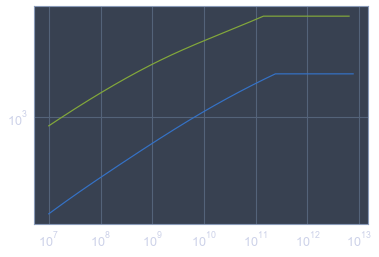

In [4]:
''' before try to evolve, verify that starting / ending t10s give calculable static models'''

u = ongp.evol(z_eos_option='reos water', atm_option='f11_tables u')

u.static(mtot='u', mcore=13., zenv=0.1, t10=150.)
print u.t10, u.teff
plt.loglog(u.p, u.t)

u.static(mtot='u', mcore=13., zenv=0.1, t10=840.)
print u.t10, u.teff
plt.loglog(u.p, u.t)


In [5]:
import ongp
reload(ongp)
u = ongp.evol(z_eos_option='reos water', atm_option='f11_tables u')
h = u.run(mtot='u', mcore=13., zenv=0.1, start_t=840., nsteps=100, end_t=150., which_t='t10')

        step        iters           t1          t10         teff       radius       s_mean        dt_yr      age_gyr  nz_gradient     nz_shell       y_surf     walltime 
           0           24       -1.000      840.000      181.716    3.790e+09        7.949    0.000e+00        0.000            0            0        0.270        0.388
           1           24       -1.000      825.509      179.904    3.759e+09        7.923    3.236e+05        0.000            0            0        0.270        0.817
           2           23       -1.000      811.268      178.120    3.730e+09        7.897    3.384e+05        0.001            0            0        0.270        1.187
           3           23       -1.000      797.273      176.365    3.700e+09        7.872    3.550e+05        0.001            0            0        0.270        1.553
           4           22       -1.000      783.519      174.638    3.672e+09        7.846    3.716e+05        0.001            0            0        0.27

          48           20       -1.000      364.352      109.445    2.871e+09        6.727    2.663e+06        0.052            0            0        0.270       18.032
          49           20       -1.000      358.067      107.935    2.860e+09        6.701    2.815e+06        0.054            0            0        0.270       18.382
          50           19       -1.000      351.890      106.453    2.848e+09        6.676    2.973e+06        0.057            0            0        0.270       18.716
          51           19       -1.000      345.819      104.999    2.838e+09        6.651    3.142e+06        0.061            0            0        0.270       19.059
          52           19       -1.000      339.853      103.573    2.827e+09        6.626    3.317e+06        0.064            0            0        0.270       19.371
          53           19       -1.000      333.991      102.175    2.816e+09        6.601    3.506e+06        0.067            0            0        0.270

          97           17       -1.000      155.312       60.266    2.506e+09        5.528    1.344e+08        1.203            0            0        0.270       33.703
          98           17       -1.000      152.633       59.872    2.501e+09        5.504    1.658e+08        1.369            0            0        0.270       34.012
          99           17       -1.000      150.000       59.356    2.497e+09        5.481    2.407e+08        1.609            0            0        0.270       34.320


(50.0, 188.89933177282484)

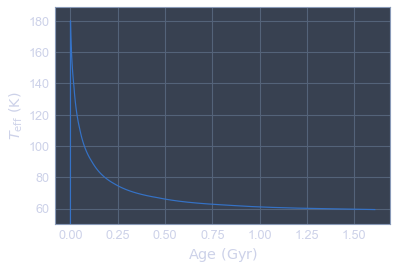

In [6]:
plt.plot(h['age'], h['teff'])
plt.xlabel(r'${\rm Age}\ ({\rm Gyr})$')
plt.ylabel(r'$T_{\rm eff}\ (\rm K)$')

plt.ylim(ymin=50.)